In [ ]:
import os
import glob

import numpy as np
from tqdm import tqdm
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
PATH = '/content/drive/MyDrive/flowers'
types = os.listdir(PATH)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def readimage(dir):
    path = os.path.join(dir,'*.jpg')
    imgs = []
    for img_file in glob.glob(path):
        img = cv2.imread(img_file)
        img = cv2.resize(img, (320, 240)).astype(np.float32)
        img /= .255
        imgs.append(img)
    return imgs

In [ ]:
i = 0
for f_type in tqdm(types):
    X = np.array(readimage(os.path.join(PATH, f_type)))
    Y= np.array([i for img in glob.glob(os.path.join(PATH,f_type,'*.jpg'))])
    i += 1

100%|██████████| 3/3 [02:20<00:00, 46.92s/it]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from tensorflow.keras import layers

num_classes = 3
model = tf.keras.Sequential([
    #konvolusi
    layers.Conv2D(32, 3, activation='relu'),
    #average pooling
    layers.AveragePooling2D(),
    #konvolusi
    layers.Conv2D(32, 3, activation='relu'),
    #maxpooling
    layers.MaxPooling2D(),
    # flattern
    layers.Flatten(),
    # to ANN
    # Hidden Layer 1
    layers.Dense(128, activation='relu'),
    # Hidden Layer 2
    layers.Dense(32, activation='softmax'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split = 0.2)

Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 0.8682 - accuracy: 0.9531 - val_loss: 0.8071 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 0.8039 - accuracy: 1.0000 - val_loss: 0.7984 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 0.7952 - accuracy: 1.0000 - val_loss: 0.7897 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.7865 - accuracy: 1.0000 - val_loss: 0.7811 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.7778 - accuracy: 1.0000 - val_loss: 0.7725 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.7693 - accuracy: 1.0000 - val_loss: 0.7639 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.7607 - accuracy: 1.0000 - val_loss: 0.7555 - val_accuracy: 1.0000
Epoch 8/50
4/4 [=========================

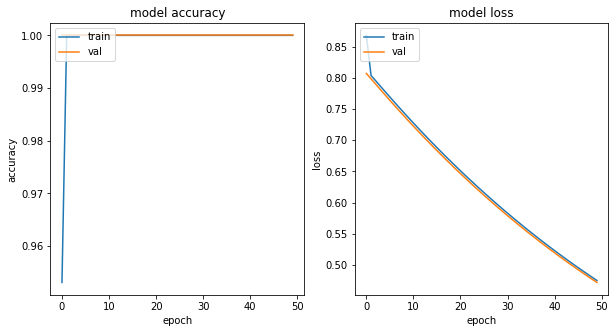

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
metrics = ['accuracy', 'loss']

for i in range(2):
    ax[i].plot(history.history[metrics[i]])
    ax[i].plot(history.history[f'val_{metrics[i]}'])
    ax[i].set_title(f'model {metrics[i]}')
    ax[i].set_ylabel(metrics[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'val'], loc='upper left')

plt.show()